In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
df= pd.read_csv(r".\diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df.info()
df.head(n=5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


Note: from the documentation from the CDC official page (https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators) 

Although the majority of the features are categorical (spare from BMI, MentHlth, PhysHlt), data is stored either by binarization or ordinal ranking.
Since the order is actually relevant, as for example Age is organized in buckets, with the highest bucket number being assigned to older people, no encoding needs to be done

Numerical columns 

In [3]:
for c in df.columns:
    print(df[c].value_counts())

Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64
HighBP
1.0    39832
0.0    30860
Name: count, dtype: int64
HighChol
1.0    37163
0.0    33529
Name: count, dtype: int64
CholCheck
1.0    68943
0.0     1749
Name: count, dtype: int64
BMI
27.0    6327
26.0    4975
28.0    4583
24.0    4392
30.0    4344
        ... 
85.0       1
83.0       1
80.0       1
78.0       1
74.0       1
Name: count, Length: 80, dtype: int64
Smoker
0.0    37094
1.0    33598
Name: count, dtype: int64
Stroke
0.0    66297
1.0     4395
Name: count, dtype: int64
HeartDiseaseorAttack
0.0    60243
1.0    10449
Name: count, dtype: int64
PhysActivity
1.0    49699
0.0    20993
Name: count, dtype: int64
Fruits
1.0    43249
0.0    27443
Name: count, dtype: int64
Veggies
1.0    55760
0.0    14932
Name: count, dtype: int64
HvyAlcoholConsump
0.0    67672
1.0     3020
Name: count, dtype: int64
AnyHealthcare
1.0    67508
0.0     3184
Name: count, dtype: int64
NoDocbcCost
0.0    64053
1.0     6639
Name: count, dty

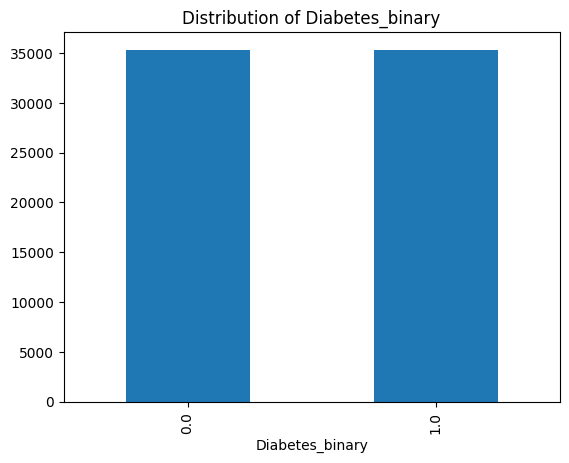

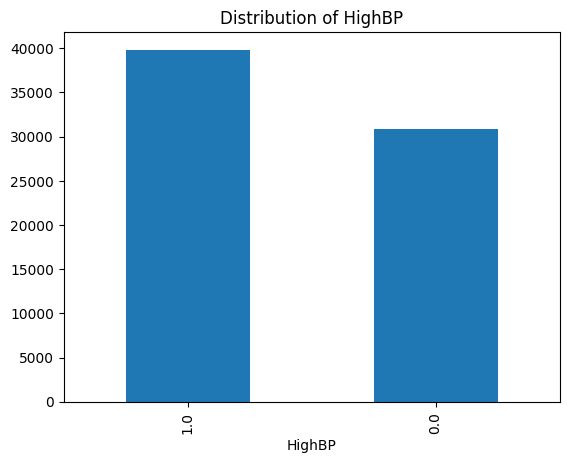

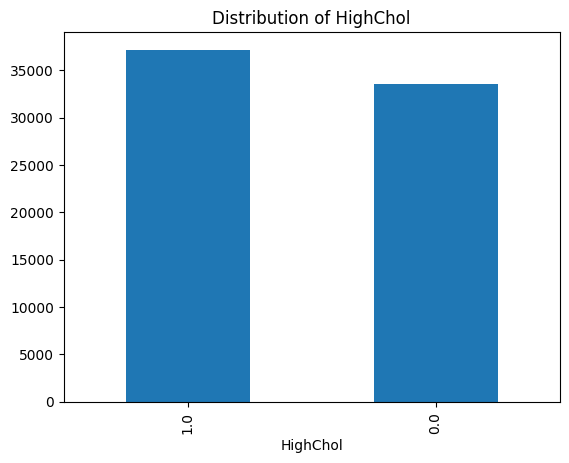

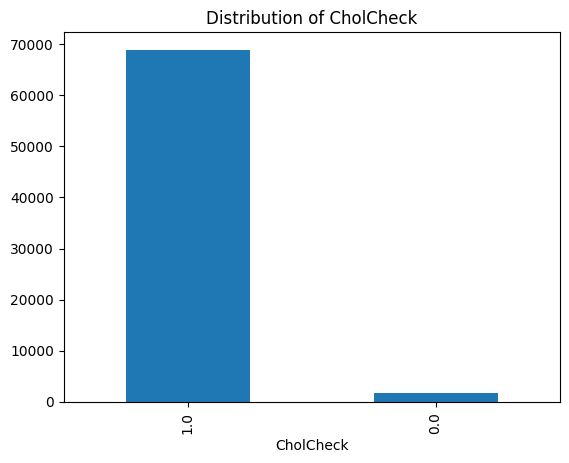

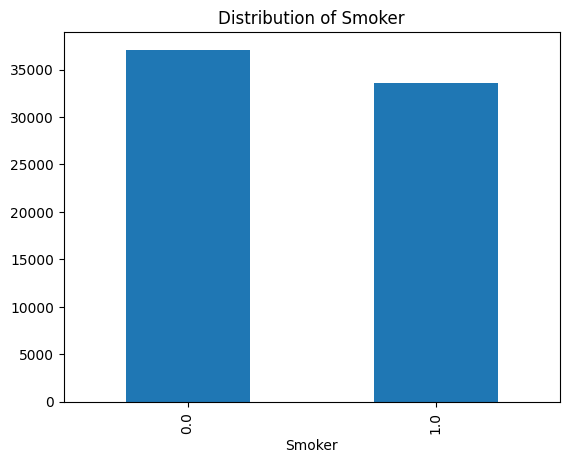

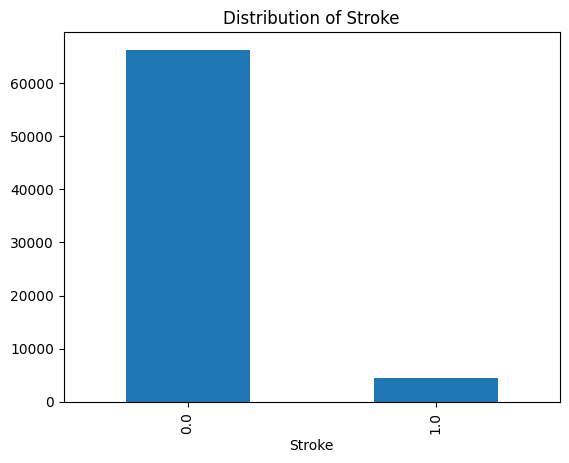

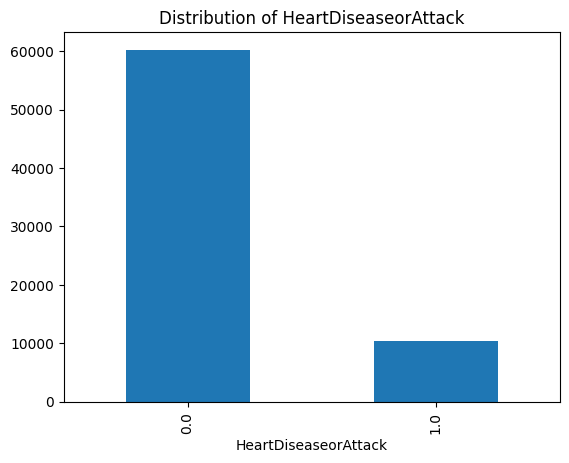

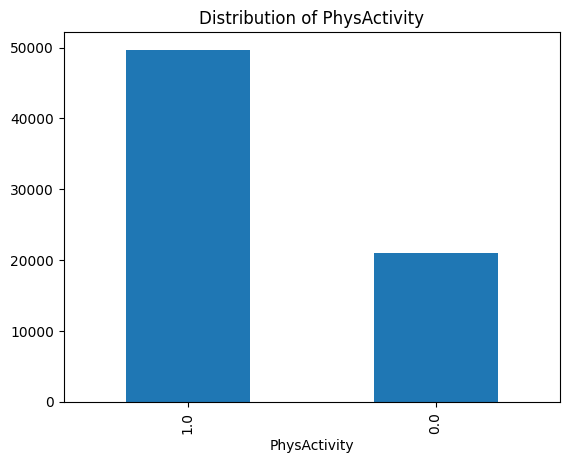

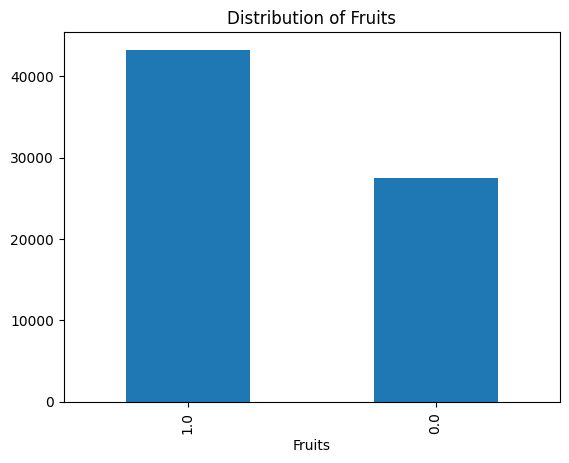

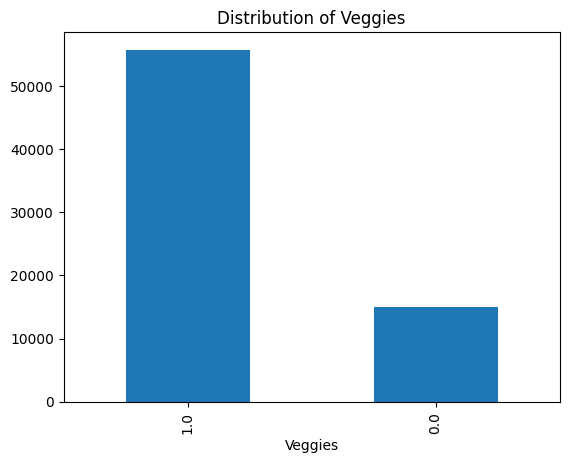

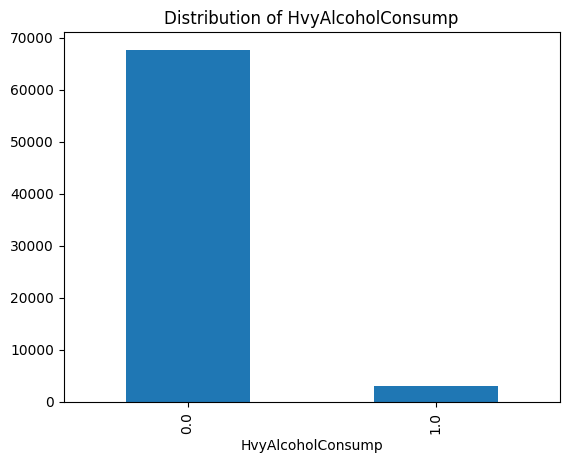

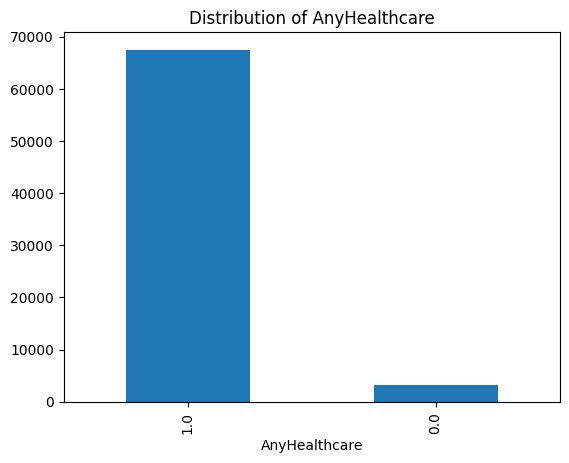

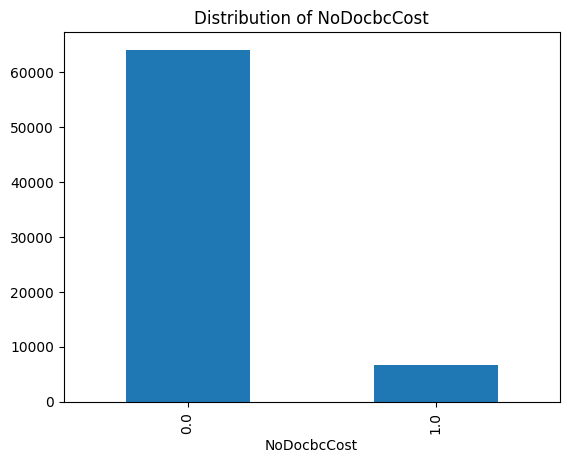

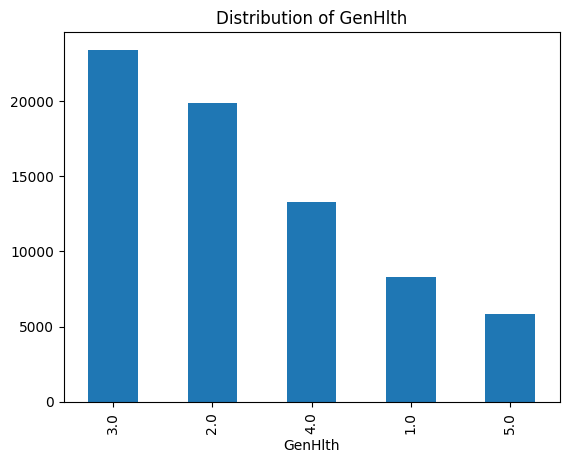

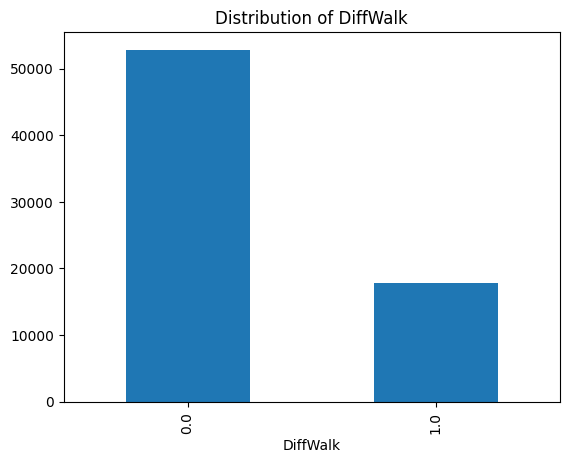

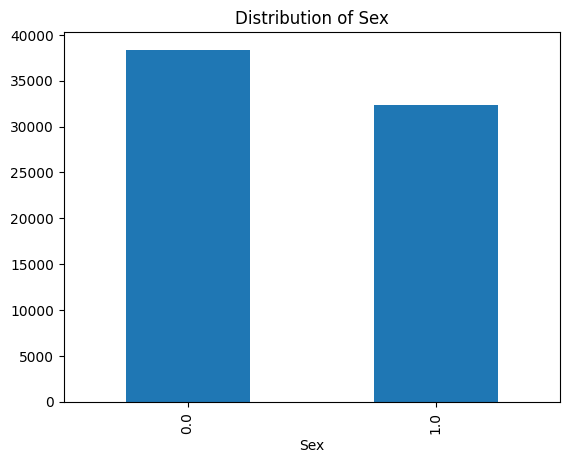

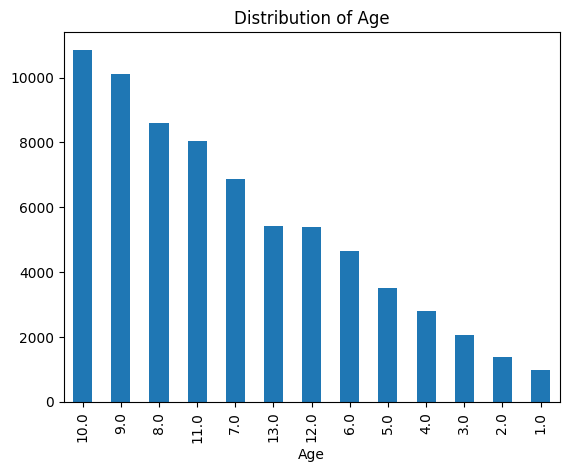

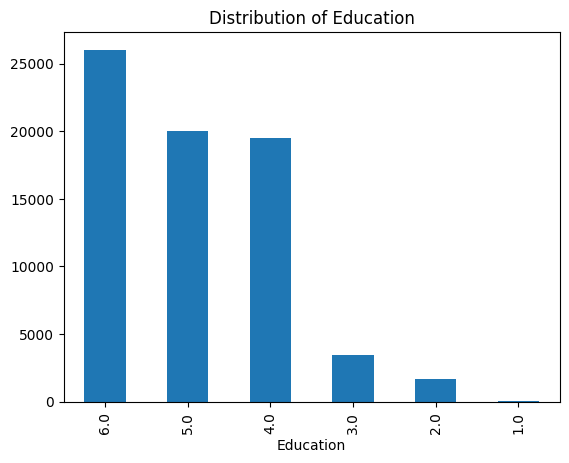

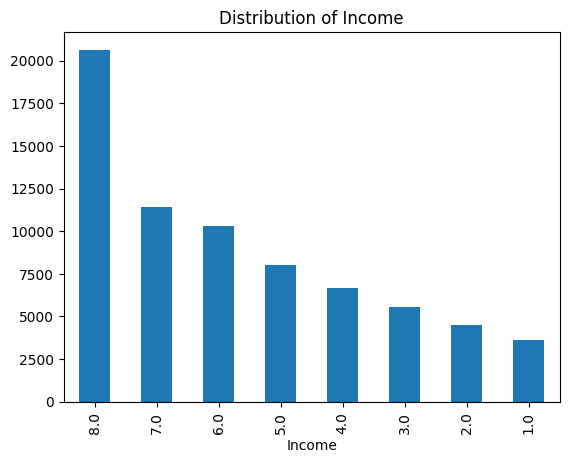

In [14]:
import matplotlib.pyplot as plt
num= ['BMI', 'MentHlth', 'PhysHlth']

cat= [c for c in df if c not in num]

for c in cat:
    df[c].value_counts().plot(kind='bar',
                title=f'Distribution of {c}')
    plt.show()

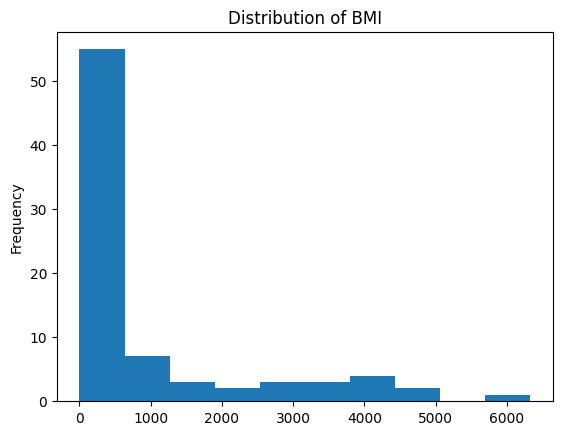

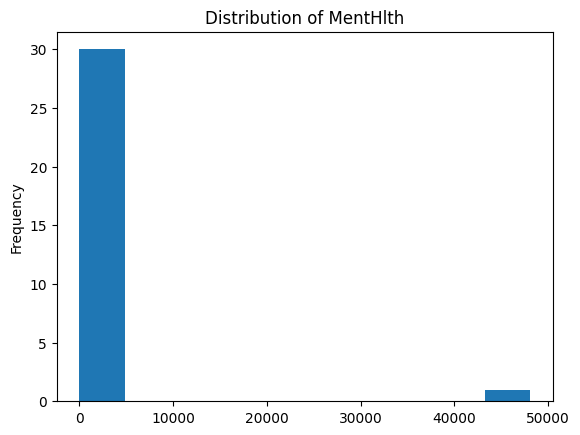

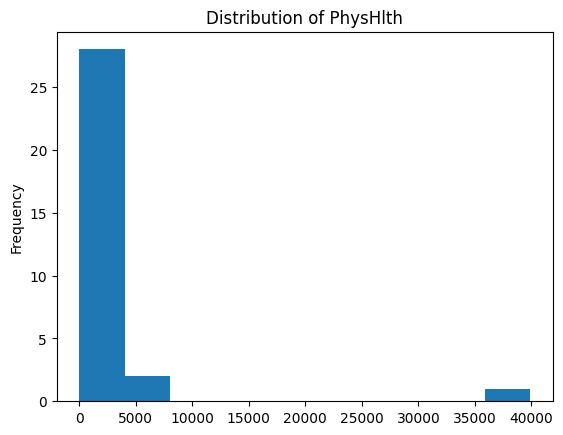

In [15]:
for c in num:
    df[c].value_counts().plot(kind='hist',
                title=f'Distribution of {c}')
    plt.show()